## **End to end Multi-class Dog Breed Classification**

This notebook builds an end-to-end multi-class image classifier using Tensorflow.

### 1. Problem 

Identifying the breed of any dog from an image
### 2. Data

Data is being used from the Kaggle Dog Breed Identification competition : https://www.kaggle.com/c/dog-breed-identification/data
### 3. Evaluation

The evaluation is a file with predicted probabilities for each dog breed of each test image
### 4. Features

* We are dealing with unstructured data
* There are 120 different dog breeds 
* There are 10,000+ images in test and training set.


In [1]:
import tensorflow as tf


2025-01-14 20:08:17.596246: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-14 20:08:17.603467: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1736865497.611699   21717 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1736865497.614216   21717 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-01-14 20:08:17.622863: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [2]:
print("Tensorflow Version: ", tf.__version__)

Tensorflow Version:  2.18.0


In [3]:
print("GPU: " , "available" if tf.config.list_physical_devices("GPU") else "No")

GPU:  available


In [4]:
import tensorflow_hub as tub

**Turning all of our data into tensors (numerical representation for unstructured data)**

In [5]:
import pandas as pd

In [6]:
labels_csv =pd.read_csv('/home/smayan/Desktop/AI-ML-DS/AI-and-ML-Course/Deep Learning/dog-breed-identification/labels.csv')
labels_csv.head()

id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever

In [7]:
labels_csv.describe()

id               breed
count                              10222               10222
unique                             10222                 120
top     000bec180eb18c7604dcecc8fe0dba07  scottish_deerhound
freq                                   1                 126

<Axes: xlabel='breed'>

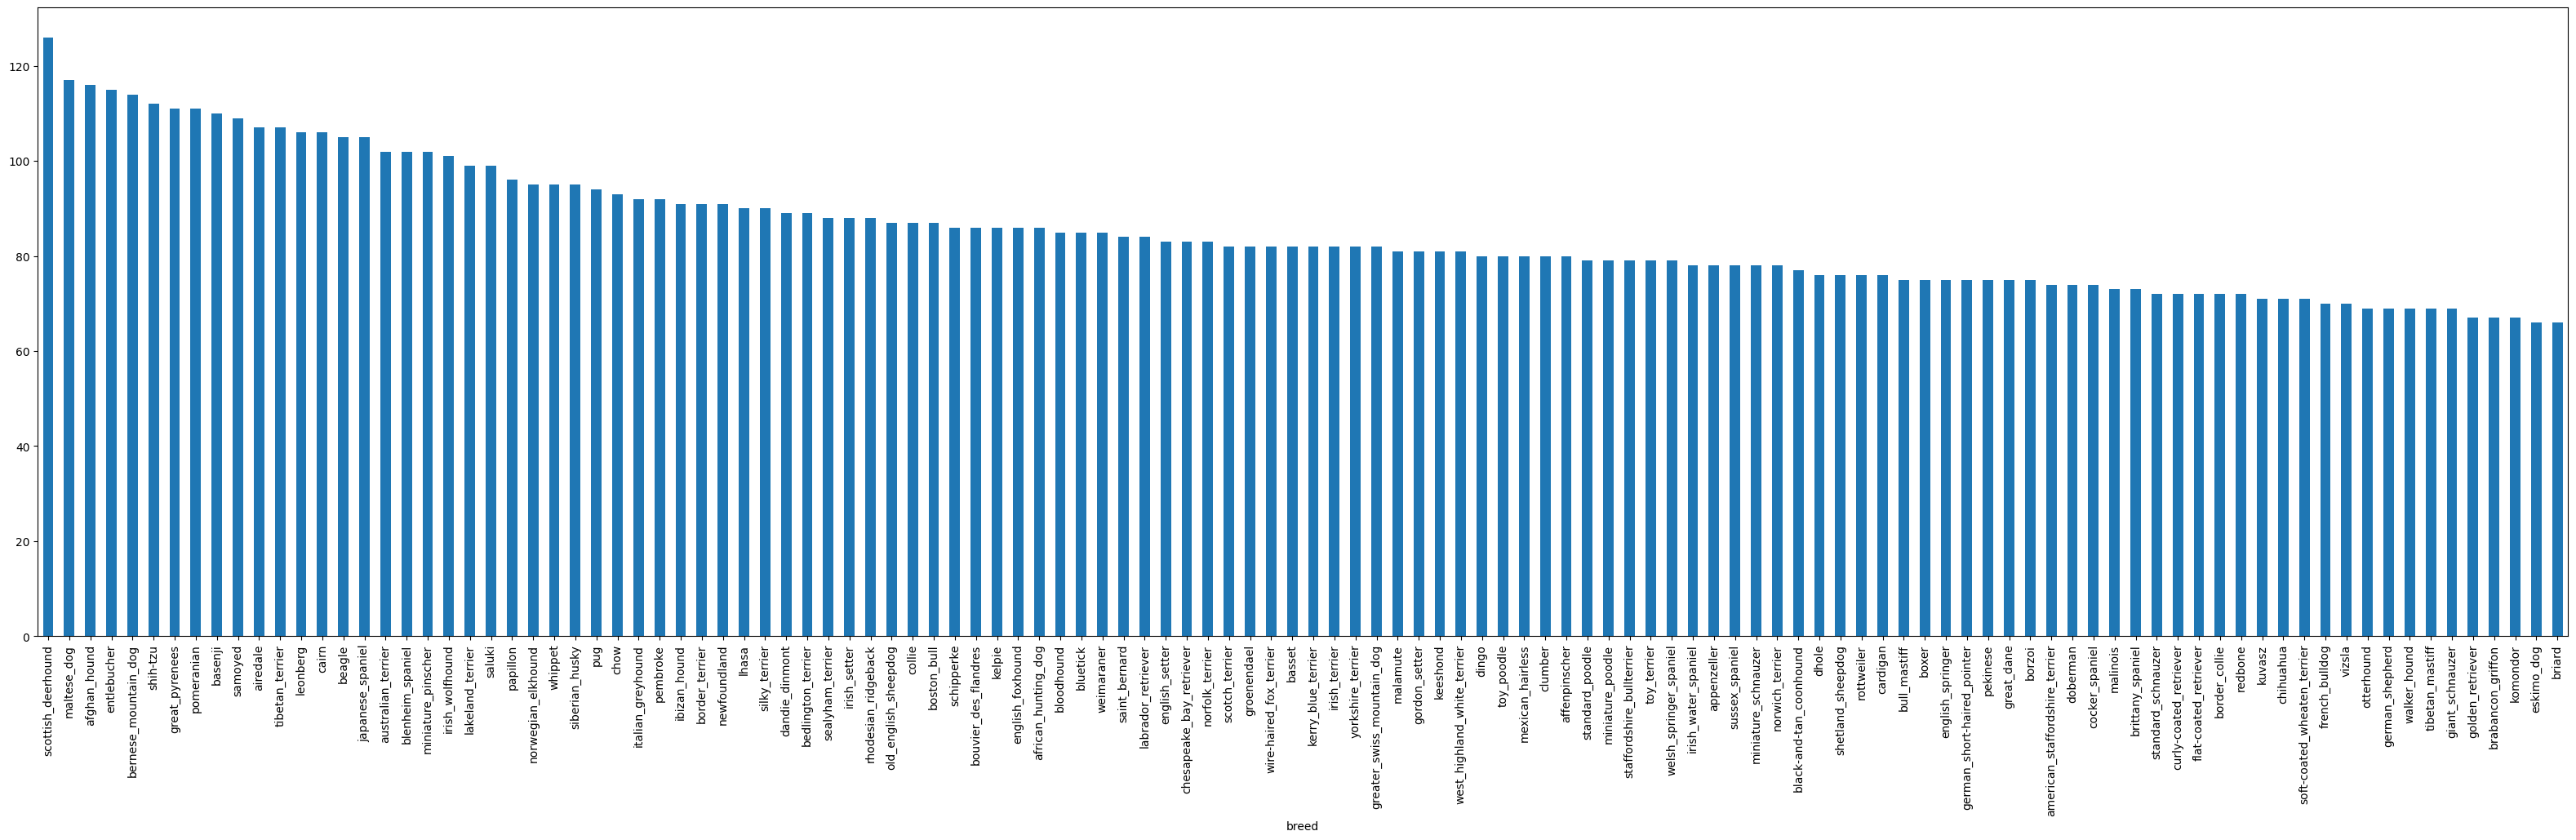

In [8]:
labels_csv['breed'].value_counts().plot.bar(figsize = (40,10))

In [9]:
labels_csv['breed'].value_counts().median()

82.0

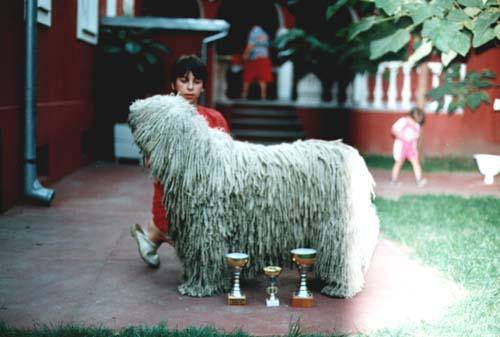

In [10]:
from IPython.display import Image
Image("/home/smayan/Desktop/AI-ML-DS/AI-and-ML-Course/Deep Learning/dog-breed-identification/train/0a001d75def0b4352ebde8d07c0850ae.jpg")


#### **Getting a list of all image file pathnames**

In [11]:
filenames = ["/home/smayan/Desktop/AI-ML-DS/AI-and-ML-Course/Deep Learning/dog-breed-identification/train/"+fname+".jpg" for fname in labels_csv['id']]
filenames[:10]

['/home/smayan/Desktop/AI-ML-DS/AI-and-ML-Course/Deep Learning/dog-breed-identification/train/000bec180eb18c7604dcecc8fe0dba07.jpg',
 '/home/smayan/Desktop/AI-ML-DS/AI-and-ML-Course/Deep Learning/dog-breed-identification/train/001513dfcb2ffafc82cccf4d8bbaba97.jpg',
 '/home/smayan/Desktop/AI-ML-DS/AI-and-ML-Course/Deep Learning/dog-breed-identification/train/001cdf01b096e06d78e9e5112d419397.jpg',
 '/home/smayan/Desktop/AI-ML-DS/AI-and-ML-Course/Deep Learning/dog-breed-identification/train/00214f311d5d2247d5dfe4fe24b2303d.jpg',
 '/home/smayan/Desktop/AI-ML-DS/AI-and-ML-Course/Deep Learning/dog-breed-identification/train/0021f9ceb3235effd7fcde7f7538ed62.jpg',
 '/home/smayan/Desktop/AI-ML-DS/AI-and-ML-Course/Deep Learning/dog-breed-identification/train/002211c81b498ef88e1b40b9abf84e1d.jpg',
 '/home/smayan/Desktop/AI-ML-DS/AI-and-ML-Course/Deep Learning/dog-breed-identification/train/00290d3e1fdd27226ba27a8ce248ce85.jpg',
 '/home/smayan/Desktop/AI-ML-DS/AI-and-ML-Course/Deep Learning/dog-br

In [12]:
import os
if len(os.listdir("/home/smayan/Desktop/AI-ML-DS/AI-and-ML-Course/Deep Learning/dog-breed-identification/train/")) == len(filenames):
    print("Matching")
else:
    print("There is a mistake")

Matching


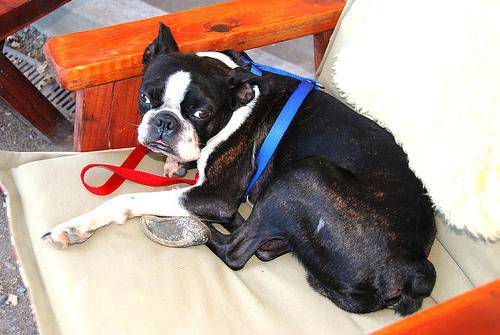

In [13]:
Image(filenames[4040])

In [14]:
labels_csv.iloc[4040]

id       6487f0f5886fa4e46ef422d8069acb8d
breed                                 pug
Name: 4040, dtype: object

#### **Let's prepare our labels**

In [15]:
import numpy as np

In [16]:
labels = labels_csv['breed'].to_numpy()

In [17]:
labels

array(['boston_bull', 'dingo', 'pekinese', ..., 'airedale',
       'miniature_pinscher', 'chesapeake_bay_retriever'], dtype=object)

In [18]:
if len(labels) == len(filenames) :  
    print("No issues")
else:
    print("Number of labels does not match number of file names")

No issues


In [19]:
unique_breeds = np.unique(labels)

In [20]:
len(unique_breeds)

120

#### **Turn every label into a boolean array**

In [21]:
print(labels[0])
labels[0] == unique_breeds   #Returns a boolean array where only the location where the given label is present is as True and every other one is as false.

boston_bull


array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False])

In [22]:
boolean_labels = [label == unique_breeds for label in labels]

In [23]:
boolean_labels[:2]

[array([False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False,  True, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False, False, False, False, False, False, False,
        False, False, False]),
 array([False, False, False, False, False, Fal

In [24]:
len(boolean_labels)

10222

In [25]:
print(boolean_labels[0].argmax())
print(boolean_labels[0].astype(int))


19
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]


#### **Creating our own validation set**

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X = filenames
y = boolean_labels

We're going to start off with experimenting with 1000 images and increase as needed.

In [28]:
NUM_IMAGES = 1000
X_train,X_val,y_train,y_val = train_test_split(X[:NUM_IMAGES], y[:NUM_IMAGES], test_size=0.2,random_state=42)

In [29]:
len(X_train),len( X_val), len(y_train), len(y_val)

(800, 200, 800, 200)

#### **Preprocessing Images (Turning Images into Tensors)**

We will create a function to do so:
1. Take Image Filepath as input
2. Use Tensorflow to read the file and save it to a variable 'image' 
3. Turn out 'image' a '.jpg' into a Tensor
4. Normalize our image (convert color channel values from 0-255 to 0-1)
5. Resize the 'image' to be a shape of (224,224)
6. Return the modified 'image'

In [30]:
from matplotlib.pyplot import imread
image = imread(filenames[42])
image.shape

(257, 350, 3)

In [31]:
tf.constant(image)[:2]

I0000 00:00:1736865499.367749   21717 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9519 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4070 SUPER, pci bus id: 0000:01:00.0, compute capability: 8.9


<tf.Tensor: shape=(2, 350, 3), dtype=uint8, numpy=
array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]]], dtype=uint8)>

In [32]:
image[:2]

array([[[ 89, 137,  89],
        [ 76, 124,  76],
        [ 63, 111,  61],
        ...,
        [ 77, 133,  86],
        [ 76, 134,  86],
        [ 76, 134,  86]],

       [[ 72, 119,  75],
        [ 67, 114,  68],
        [ 63, 110,  64],
        ...,
        [ 75, 131,  84],
        [ 74, 132,  84],
        [ 74, 132,  84]]], dtype=uint8)

In [33]:
# Define Image Size
IMG_SIZE = 224

def process_image(image_path, img_size = IMG_SIZE):
    """
    Take an image file path and turn that image into a Tensor so that it can run on the GPU

    Args:
        image_path (string): the path of the image to be converted 
    """

    image = tf.io.read_file(image_path)
    # Turn the jpeg image into a numerical tensor with 3 color channels
    image = tf.image.decode_jpeg(image, channels=3)
    # Convert the color channel values from 0-255 to 0-1 values
    image = tf.image.convert_image_dtype(image, tf.float32)
    # Resizing the image 
    image = tf.image.resize(image, size = (IMG_SIZE,IMG_SIZE))

    return image

#### **Turning out data into batches**

What's a batch?

A batch (also called mini-batch) is a small portion of your data, say 32 (32 is generally the default batch size) images and their labels. In deep learning, instead of finding patterns in an entire dataset at the same time, you often find them one batch at a time.

Let's say you're dealing with 10,000+ images (which we are). Together, these files may take up more memory than your GPU has. Trying to compute on them all would result in an error.

Instead, it's more efficient to create smaller batches of your data and compute on one batch at a time.

TensorFlow is very efficient when your data is in batches of (image, label) Tensors. So we'll build a function to do create those first. We'll take advantage of of process_image function at the same time.

In [34]:
def get_image_label(image_path, label):
    """
    Takes an image file path and the associated label and
    processes the image and returns it as a tuple in the form
    (image, label)
    """ 
    image = process_image(image_path)
    return image, label

In [35]:
(process_image(X[42]), y[42])

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[0.3264178 , 0.5222886 , 0.3232816 ],
         [0.2537167 , 0.44366494, 0.24117757],
         [0.25699762, 0.4467087 , 0.23893751],
         ...,
         [0.29325107, 0.5189916 , 0.3215547 ],
         [0.29721776, 0.52466875, 0.33030328],
         [0.2948505 , 0.5223015 , 0.33406618]],
 
        [[0.25903144, 0.4537807 , 0.27294815],
         [0.24375686, 0.4407019 , 0.2554778 ],
         [0.2838985 , 0.47213382, 0.28298813],
         ...,
         [0.2785345 , 0.5027992 , 0.31004712],
         [0.28428748, 0.5108719 , 0.32523635],
         [0.28821915, 0.5148036 , 0.32916805]],
 
        [[0.20941195, 0.40692952, 0.25792548],
         [0.24045378, 0.43900946, 0.2868911 ],
         [0.29001117, 0.47937486, 0.32247734],
         ...,
         [0.26074055, 0.48414773, 0.30125174],
         [0.27101526, 0.49454468, 0.32096273],
         [0.27939945, 0.5029289 , 0.32934693]],
 
        ...,
 
        [[0.00634795, 0.03442048

#### **Defining a fucntioon to turn all of the data into batches**

In [ ]:
# Define the batch size, default to 32
BATCH_SIZE = 32

def create_data_batches(X, y  = None, batch_size = BATCH_SIZE, val_data = False, test_data = False):
    if test_data:
        print("Creating Test Data Batches: ")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X)))
        data_batch = data.map(process_image).batch(BATCH_SIZE)
        return data_batch
    elif val_data: 
        print("Creating Validation Data Batches: ")
        data =tf.data.Dataset.from_tensor_slices((tf.constant(X), # Filepaths
                                                 tf.constant(y))) #Labels
        data_batch = data.map(get_image_label).batch(BATCH_SIZE)
        return data_batch
    else:
        print("Creating Training Data Batches")
        data = tf.data.Dataset.from_tensor_slices((tf.constant(X), 
                                                   tf.constant(y)))
        data = data.shuffle(buffer_size=len(X))
        data = data.map(get_image_label)
        data_batch = data.batch(BATCH_SIZE)
        return data_batch

In [40]:
train_data = create_data_batches(X_train,y_train)

Creating Training Data Batches


In [41]:
val_data = create_data_batches(X_val, y_val, val_data=True)
    

Creating Validation Data Batches: 


In [42]:
# Checking Different Attributes of data batches

train_data.element_spec, val_data.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)),
 (TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, 120), dtype=tf.bool, name=None)))

In [45]:
tf.__version__

'2.18.0'

#### **Visualizing Data Batches**

In [46]:
import matplotlib.pyplot as plt

In [56]:
def show_25_images(images, labels):
    """
    Displays a plot of 25 images and their labels from a data batch
    """

    plt.figure(figsize=(15,15))
    for i in range(25):
        ax=plt.subplot(5,5, i+1)    

        plt.imshow(images[i])
        plt.title(unique_breeds[labels[i].argmax()])
        plt.axis("off")

In [57]:
train_images, train_labels = next(train_data.as_numpy_iterator())
train_images, train_labels

(array([[[[3.41176480e-01, 3.49019617e-01, 3.45098048e-01],
          [3.31302524e-01, 3.39145660e-01, 3.35224092e-01],
          [3.23669463e-01, 3.31512600e-01, 3.27591032e-01],
          ...,
          [6.08893573e-01, 6.04972005e-01, 5.85364163e-01],
          [6.11764729e-01, 6.07843161e-01, 5.88235319e-01],
          [6.11764729e-01, 6.07843161e-01, 5.88235319e-01]],
 
         [[3.37885171e-01, 3.45728308e-01, 3.41806740e-01],
          [3.28011215e-01, 3.35854352e-01, 3.31932783e-01],
          [3.20378155e-01, 3.28221291e-01, 3.24299723e-01],
          ...,
          [6.08893573e-01, 6.04972005e-01, 5.85364163e-01],
          [6.11764729e-01, 6.07843161e-01, 5.88235319e-01],
          [6.11764729e-01, 6.07843161e-01, 5.88235319e-01]],
 
         [[3.31512600e-01, 3.39355737e-01, 3.35434169e-01],
          [3.24048370e-01, 3.31891507e-01, 3.27969939e-01],
          [3.18978846e-01, 3.26821983e-01, 3.22900414e-01],
          ...,
          [6.08893573e-01, 6.04972005e-01, 5.8536

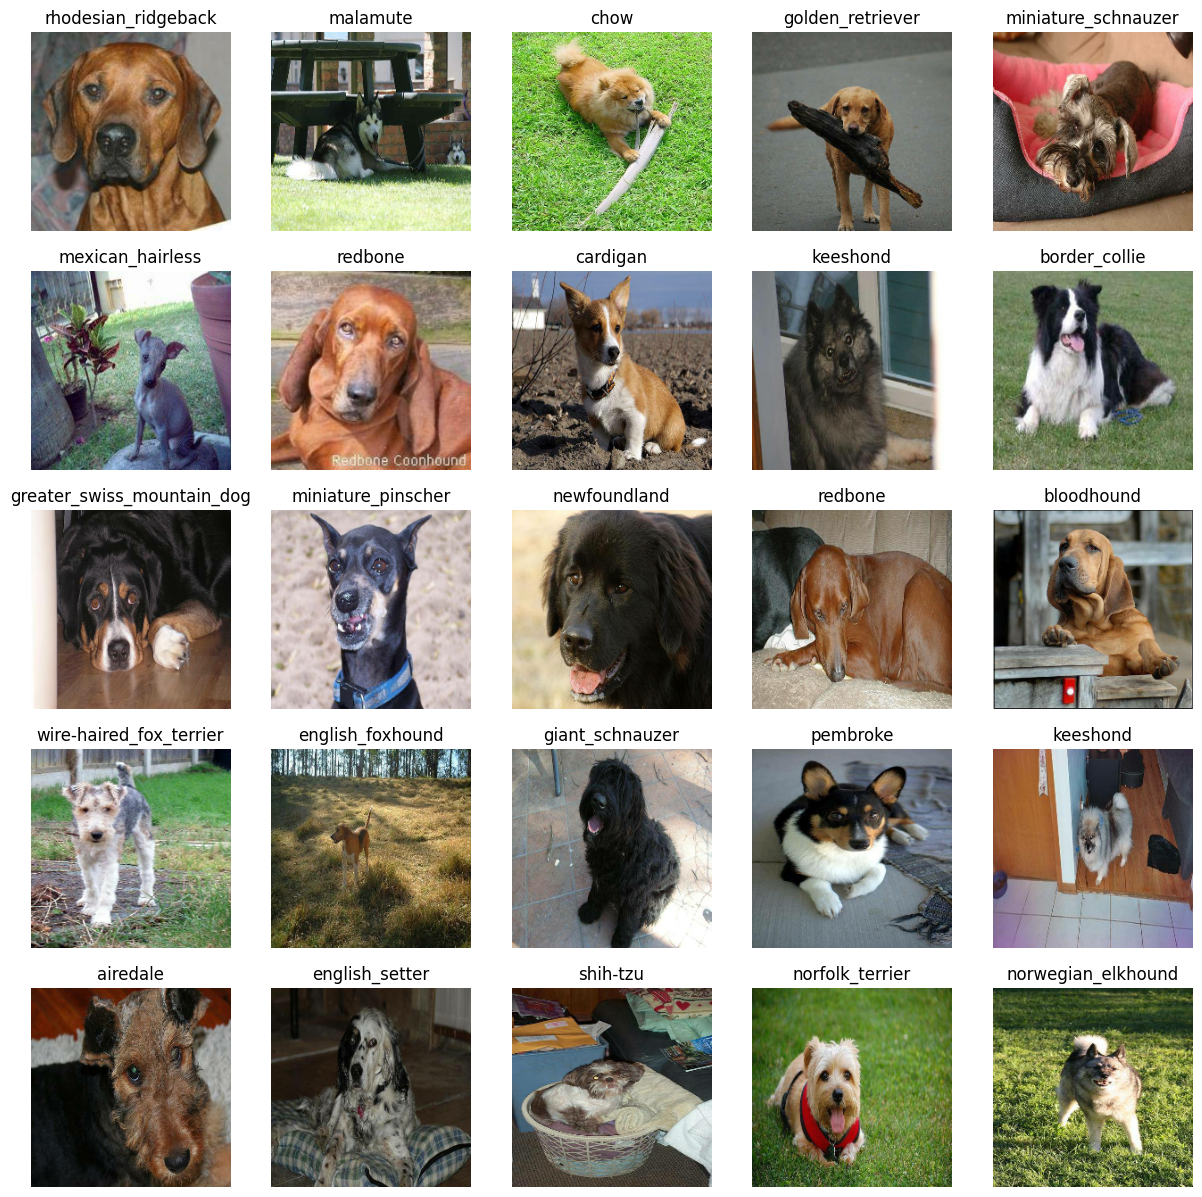

In [58]:
show_25_images(train_images, train_labels)

In [59]:
val_images, val_labels = next(val_data.as_numpy_iterator())
val_images, val_labels

(array([[[[0.29599646, 0.43284872, 0.3056691 ],
          [0.26635826, 0.32996926, 0.22846507],
          [0.31428418, 0.27701408, 0.22934894],
          ...,
          [0.77614343, 0.82320225, 0.8101595 ],
          [0.81291157, 0.8285351 , 0.8406944 ],
          [0.8209297 , 0.8263737 , 0.8423668 ]],
 
         [[0.2344871 , 0.31603682, 0.19543913],
          [0.3414841 , 0.36560842, 0.27241898],
          [0.45016077, 0.40117094, 0.33964607],
          ...,
          [0.7663987 , 0.8134138 , 0.81350833],
          [0.7304248 , 0.75012016, 0.76590735],
          [0.74518913, 0.76002574, 0.7830809 ]],
 
         [[0.30157745, 0.3082587 , 0.21018331],
          [0.2905954 , 0.27066195, 0.18401104],
          [0.4138316 , 0.36170745, 0.2964005 ],
          ...,
          [0.79871625, 0.8418535 , 0.8606443 ],
          [0.7957738 , 0.82859945, 0.8605655 ],
          [0.75181633, 0.77904975, 0.8155256 ]],
 
         ...,
 
         [[0.9746779 , 0.9878955 , 0.9342279 ],
          [0.99153

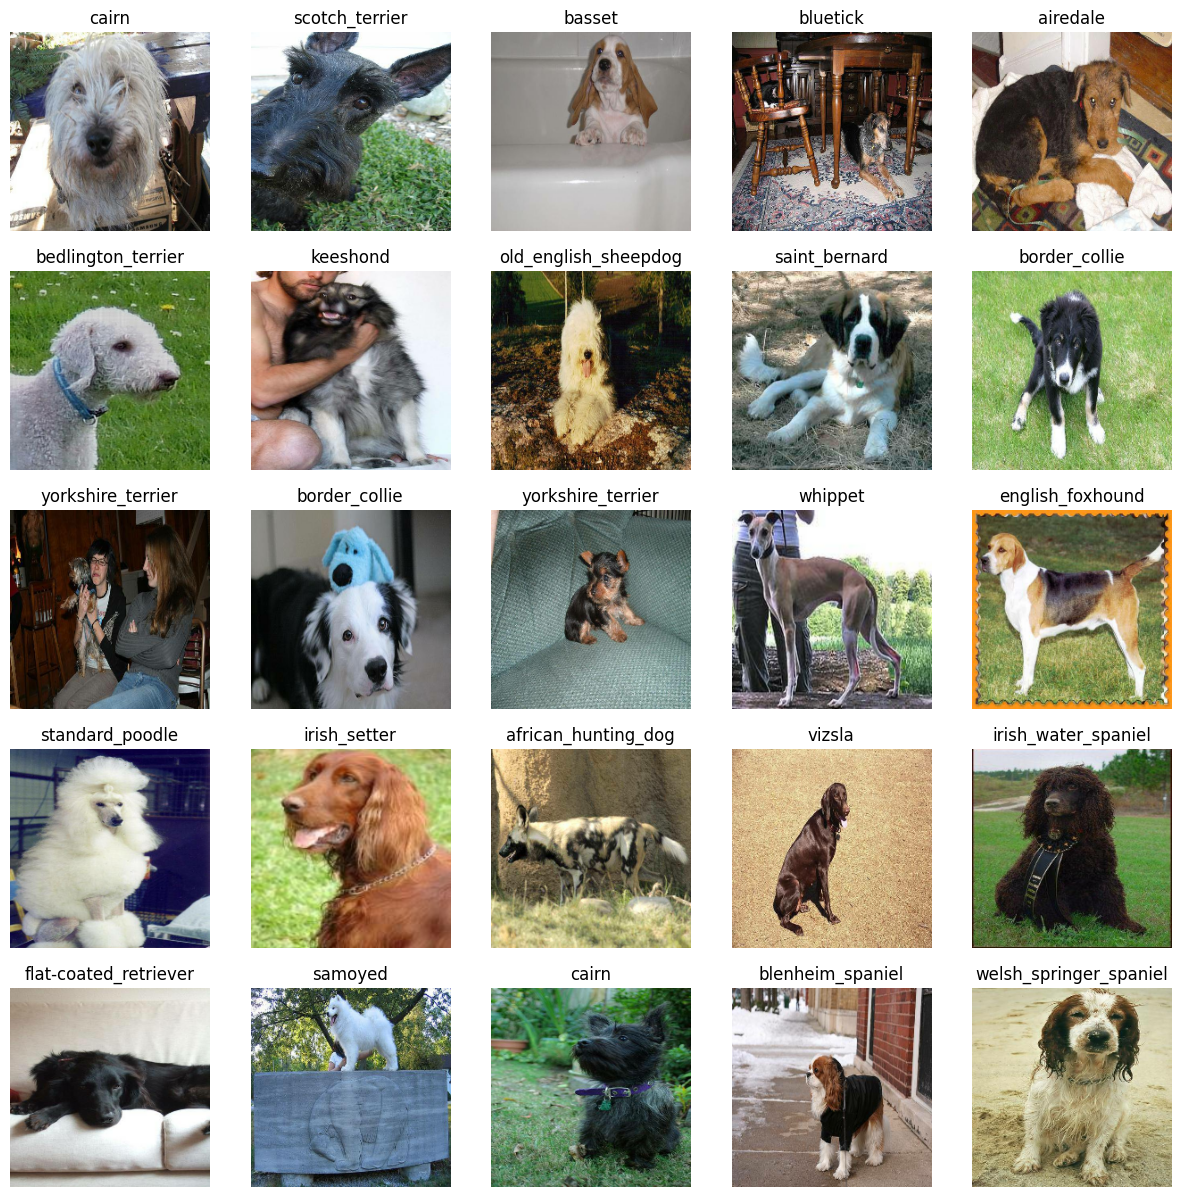

In [60]:
show_25_images(val_images, val_labels)